In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [2]:
# Topic: Predictive Analysis of Car Price in USA
# Data source: USA_cars_datasets was gotten from Kaggle website.
# The Data comprises of 2499 observations and 12 variables from 1973 to 2020.
# The price (car price) is the response variable and it is in dollars.

df = pd.read_csv("USA_cars_datasets.csv")
df = df.iloc[:,1:]

print(df.shape)
print('-'*100) 
print(df.columns)
print('-'*100) 
print(df["year"].unique())
print('-'*100)
df.head()

(2499, 12)
----------------------------------------------------------------------------------------------------
Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')
----------------------------------------------------------------------------------------------------
[2008 2011 2018 2014 2010 2017 2009 2013 2015 2020 2016 1973 2003 2019
 2002 2000 2001 2005 2012 2006 2007 1998 2004 1994 1997 1996 1999 1984
 1995 1993]
----------------------------------------------------------------------------------------------------


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
# selecting useful colnums for my analysis

df1 = df.iloc[0:2499,[0,1,2,3,4,5,6,8,9]]
print(df1.shape)
df1.head()


(2499, 9)


,price,brand,model,year,title_status,mileage,color,lot,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida


In [4]:
#1.Inspection
# a) Taking a quick view of the entire data sets
# b) The distribution of car price across the states (Objective: To know which state is driving price)
# c) The distribution of car price across the different brands (Objective: To know which brab is driving price)
# d) The distribution of car price across the different colours (Objective: To know which colour is driving price)
# e) The distribution of car price across the different models (Objective: To know which car model is driving price)
# f) The distribution of car price across the millage (Objective: To know the average price per millage, put millage in bins)
# g) The distribution of car price across the different years (Objective: To know which year is driving price)


#2
#Visualization

# a) Histograms of the qualitative covariates: Objective- As in no 1
# b) Bar plots of the qualitative covariates:  Objective- As in no 1
# c) Scatter plots of my quantitative covariates vs respnse(price) Objective: To know how each variable can enter the model
# d) Boxplots of the qualitative covariates vs price. Objective: To know which of them should enter the model

#3
# Fitting models
# Multiple Linear Regression
# Polynomial Regression

#4 
# Model validation
# R^2 / R-squared
# Mean Squared Error (MSE)

In [5]:
# a) Taking a quick view of the entire data sets
print(df1.dtypes)
print('-'*100)
print(''*100)

df1.describe(include = "all")


price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
lot               int64
state            object
dtype: object
----------------------------------------------------------------------------------------------------



,price,brand,model,year,title_status,mileage,color,lot,state
count,2499.000000,2499,2499,2499.000000,2499,2.499000e+03,2499,2.499000e+03,2499
unique,NaN,28,127,NaN,2,NaN,49,NaN,44
top,NaN,ford,door,NaN,clean vehicle,NaN,white,NaN,pennsylvania
freq,NaN,1235,651,NaN,2336,NaN,707,NaN,299
mean,18767.671469,NaN,NaN,2016.714286,NaN,5.229869e+04,NaN,1.676914e+08,NaN
std,12116.094936,NaN,NaN,3.442656,NaN,5.970552e+04,NaN,2.038772e+05,NaN
min,0.000000,NaN,NaN,1973.000000,NaN,0.000000e+00,NaN,1.593488e+08,NaN
25%,10200.000000,NaN,NaN,2016.000000,NaN,2.146650e+04,NaN,1.676253e+08,NaN
50%,16900.000000,NaN,NaN,2018.000000,NaN,3.536500e+04,NaN,1.677451e+08,NaN
75%,25555.500000,NaN,NaN,2019.000000,NaN,6.347250e+04,NaN,1.677798e+08,NaN


In [6]:
# b) The distribution of car price across the states (Objective: To know which state is driving price)

df_state = df1.groupby(["state"])

state1 = pd.DataFrame(df1["state"].value_counts().sort_index())

state2 = pd.DataFrame(df1["state"].value_counts(normalize = True).sort_index())

state3 = pd.concat([state1, state2], axis='columns', sort=False)
state3.columns = ['num_cars', 'num_cars(%)']


state4 = pd.DataFrame(df_state["price"].agg(["sum","mean","median"]).sort_index())
state4.columns = ['total_car_price', 'mean_car_price', 'median_car_price']

state5 = pd.concat([state3, state4], axis='columns', sort=False)

print(state5.sort_values(by=['num_cars'], ascending=False).head(3))
state5.sort_values(by=['total_car_price','median_car_price'], ascending=False).head(3)


# The most 5 top states in USA driving price are "pennsylvania", "michigan" and "florida" with 
# (total_car_price, median_car_price) of ($6820253,$21000), ($4039070,$25000) and ($3708605,$12530) respectively.

# Also, 12%, 10% and 9% of the cars in USA are from "pennsylvania", "florida and "texas" states respectively.



              num_cars  num_cars(%)  total_car_price  mean_car_price  \
state                                                                  
pennsylvania       299     0.119648          6820253    22810.210702   
florida            246     0.098439          3708605    15075.630081   
texas              214     0.085634          2911962    13607.299065   

              median_car_price  
state                           
pennsylvania             21000  
florida                  12530  
texas                    10340  


,num_cars,num_cars(%),total_car_price,mean_car_price,median_car_price
state,,,,,
pennsylvania,299,0.119648,6820253,22810.210702,21000
michigan,169,0.067627,4039070,23899.822485,25000
florida,246,0.098439,3708605,15075.630081,12530


In [7]:
# c) The distribution of car price across the different brands (Objective: To know which brand is driving price)

df_brand = df1.groupby(["brand"])

brand1 = pd.DataFrame(df1["brand"].value_counts().sort_index())

brand2 = pd.DataFrame(df1["brand"].value_counts(normalize = True).sort_index())

brand3 = pd.concat([brand1, brand2], axis='columns', sort=False)
brand3.columns = ['num_cars', 'num_cars(%)']


brand4 = pd.DataFrame(df_brand["price"].agg(["sum","mean","median"]).sort_index())
brand4.columns = ['total_car_price', 'mean_car_price', 'median_car_price']

brand5 = pd.concat([brand3, brand4], axis='columns', sort=False)
print(brand5.sort_values(by=['num_cars'], ascending=False).head(3))
brand5.sort_values(by=['total_car_price','mean_car_price'], ascending=False).head(3)

# The most 3 top brand of cars driving price in USA are "ford", "dodge" and "chevrolet" with 
# (total_car_price, mean_car_price) of ($26758607, $21667), ($7681819, $17782), ($5544976, $18670) respectively.

# Also, 50%, 17% and 12% of car brand in USA are "ford", "dodge" and "chevrolet" respectively.



        num_cars  num_cars(%)  total_car_price  mean_car_price  \
brand                                                            
ford        1235     0.494198         26758607    21666.888259   
dodge        432     0.172869          7681819    17781.988426   
nissan       312     0.124850          3764536    12065.820513   

        median_car_price  
brand                     
ford             22000.0  
dodge            16900.0  
nissan           11450.0  


,num_cars,num_cars(%),total_car_price,mean_car_price,median_car_price
brand,,,,,
ford,1235,0.494198,26758607,21666.888259,22000.0
dodge,432,0.172869,7681819,17781.988426,16900.0
chevrolet,297,0.118848,5544976,18669.952862,17100.0


In [8]:
# d) The distribution of car price across the different colours (Objective: To know which colour is driving price)

df_color = df1.groupby(["color"])

color1 = pd.DataFrame(df1["color"].value_counts().sort_index())

color2 = pd.DataFrame(df1["color"].value_counts(normalize = True).sort_index())

color3 = pd.concat([color1, color2], axis='columns', sort=False)
color3.columns = ['num_cars', 'num_cars(%)']


color4 = pd.DataFrame(df_color["price"].agg(["sum","mean","median"]).sort_index())
color4.columns = ['total_car_price', 'mean_car_price', 'median_car_price']

color5 = pd.concat([color3, color4], axis='columns', sort=False)
print(color5.sort_values(by=['num_cars'], ascending=False).head(3))
color5.sort_values(by=['total_car_price','mean_car_price'], ascending=False).head(3)


# The most 3 top color of cars driving price in USA are "white", "black" and "gray" with 
# (total_car_price, mean_car_price) of ($13759356, $19462), ($10469400, $20290), ($6870819, $17344) respectively.

# Also, 29%, 21% and 16% of car colour in USA are "white", "black" and "gray" respectively.



       num_cars  num_cars(%)  total_car_price  mean_car_price  \
color                                                           
white       707     0.282913         13759356    19461.606789   
black       516     0.206483         10469400    20289.534884   
gray        395     0.158063          6870819    17394.478481   

       median_car_price  
color                    
white           18600.0  
black           17625.0  
gray            16400.0  


,num_cars,num_cars(%),total_car_price,mean_car_price,median_car_price
color,,,,,
white,707,0.282913,13759356,19461.606789,18600.0
black,516,0.206483,10469400,20289.534884,17625.0
gray,395,0.158063,6870819,17394.478481,16400.0


In [9]:
# e) The distribution of car price across the different models (Objective: To know which car model is driving price)

df_model = df1.groupby(["model"])

model1 = pd.DataFrame(df1["model"].value_counts().sort_index())


model2 = pd.DataFrame(df1["model"].value_counts(normalize = True).sort_index())

model3 = pd.concat([model1, model2], axis='columns', sort=False)
model3.columns = ['num_cars', 'num_cars(%)']


model4 = pd.DataFrame(df_model["price"].agg(["sum","mean","median"]).sort_index())
model4.columns = ['total_car_price', 'mean_car_price', 'median_car_price']

model5 = pd.concat([model3, model4], axis='columns', sort=False)
print(model5.sort_values(by=['num_cars'], ascending=False).head(3))
model5.sort_values(by=['total_car_price','mean_car_price'], ascending=False).head(3)

# The most 3 top model of cars driving price in USA are "door", "f-150" and "doors" with 
# (total_car_price, median_car_price) of ($8073834, $9200), ($6175108, $27202), ($2485516, $16540) respectively.

# Also, 26%, 9% and 6% of car model in USA are "door", "f-150" and "doors" respectivel

       num_cars  num_cars(%)  total_car_price  mean_car_price  \
model                                                           
door        651     0.260504          8073834    12402.202765   
f-150       219     0.087635          6175108    28196.840183   
doors       148     0.059224          2485516    16794.027027   

       median_car_price  
model                    
door             9200.0  
f-150           27202.0  
doors           16540.5  


,num_cars,num_cars(%),total_car_price,mean_car_price,median_car_price
model,,,,,
door,651,0.260504,8073834,12402.202765,9200.0
f-150,219,0.087635,6175108,28196.840183,27202.0
doors,148,0.059224,2485516,16794.027027,16540.5


In [10]:
# Grouping mileage into four groups
k = df1.copy()

for i in k['mileage']:
    if i <= 25000:
        k['mileage'] = k['mileage'].replace({i: "0-25000"})
        
    elif i > 25000 and i <= 50000:
        k['mileage'] = k['mileage'].replace({i: "26000-50000"})
        
    elif i > 51000 and i <= 75000:
        k['mileage'] = k['mileage'].replace({i: "51000-75000"})
        
    elif i > 76000 and i <= 100000:
        k['mileage'] = k['mileage'].replace({i: "76000-100000"})
        
    elif i > 101000 and i <= 125000:
        k['mileage'] = k['mileage'].replace({i: "101000-125000"})
        
    elif i > 126000 and i <= 150000:
        k['mileage'] = k['mileage'].replace({i: "100000-150000"})
        
    else:
        k['mileage'] = k['mileage'].replace({i: ">150000"})
#print(k['mileage'])
        
     
h = df1.assign(mileage_group = k['mileage'])
h.head()

,price,brand,model,year,title_status,mileage,color,lot,state,mileage_group
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,>150000
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,>150000
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia,26000-50000
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia,51000-75000
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida,0-25000


In [11]:
# f) The distribution of car price across the new millaage_group (Objective: To know the millage group that is driving price)

df_mileage = h.groupby(["mileage_group"])

mileage1 = pd.DataFrame(h["mileage_group"].value_counts().sort_index())


mileage2 = pd.DataFrame(h["mileage_group"].value_counts(normalize = True).sort_index())

mileage3 = pd.concat([mileage1, mileage2], axis='columns', sort=False)
mileage3.columns = ['num_cars', 'num_cars(%)']


mileage4 = pd.DataFrame(df_mileage["price"].agg(["sum","mean","median"]).sort_index())
mileage4.columns = ['total_car_price', 'mean_car_price', 'median_car_price']

mileage5 = pd.concat([mileage3, mileage4], axis='columns', sort=False)
mileage5.sort_values(by=['total_car_price','median_car_price'], ascending=False)

# The most 3 top group mileage of cars driving price in USA are "0-25000", "26000-50000	" and "51000-75000" with 
# (total_car_price, median_car_price) of ($37796504, $20400), ($4350929, $14000), ($12822.649485, $10420) respectively.

# Also, 68%, 11% and 8% of car mileage in USA are within "0-50000", "51000-75000" and "75000-100000" respectively.


,num_cars,num_cars(%),total_car_price,mean_car_price,median_car_price
mileage_group,,,,,
0-25000,750,0.300120,19385498,25847.330667,24300
26000-50000,961,0.384554,18411006,19158.174818,16500
51000-75000,256,0.102441,4195850,16390.039062,14100
76000-100000,188,0.075230,2384504,12683.531915,10300
101000-125000,122,0.048820,999866,8195.622951,6250
>150000,142,0.056823,889008,6260.619718,3250
100000-150000,80,0.032013,634679,7933.487500,5900


In [12]:
# g) The distribution of car price across the different years (Objective: To know which year is driving price)
df_year = df1.groupby(["year"])

year1 = pd.DataFrame(df1["year"].value_counts().sort_index())

year2 = pd.DataFrame(df1["year"].value_counts(normalize = True).sort_index())

year3 = pd.concat([year1, year2], axis='columns', sort=False)
year3.columns = ['num_cars', 'num_cars(%)']


year4 = pd.DataFrame(df_year["price"].agg(["sum","mean","median"]).sort_index())
year4.columns = ['total_car_price', 'mean_car_price', 'median_car_price']

year5 = pd.concat([year3, year4], axis='columns', sort=False)

print(year5.sort_values(by=['num_cars(%)','median_car_price'], ascending=False).head(5))
print('-'*100)
print(''*100)

year5.sort_values(by=['mean_car_price','median_car_price'], ascending=False).head(5)

# The most 3 top years driving price in USA are "1973", "2020" and "2019" with 
# (mean_car_price, median_car_price) of ($29800, $29800), ($25084, $20350), ($24025, $22800) respectively.

# Also, 36%, 16% and 15% of cars for different years in USA are "2019", "2018" and "2017" respectively.



      num_cars  num_cars(%)  total_car_price  mean_car_price  median_car_price
2019       892     0.356943         21430661    24025.404709           22800.0
2018       395     0.158063          7528044    19058.339241           16500.0
2017       377     0.150860          7010858    18596.440318           15290.0
2016       203     0.081232          3711025    18280.911330           16000.0
2015       196     0.078431          3050381    15563.168367           15000.0
----------------------------------------------------------------------------------------------------



,num_cars,num_cars(%),total_car_price,mean_car_price,median_car_price
1973,1,0.000400,29800,29800.000000,29800.0
2020,48,0.019208,1204025,25083.854167,20350.0
2019,892,0.356943,21430661,24025.404709,22800.0
2018,395,0.158063,7528044,19058.339241,16500.0
2017,377,0.150860,7010858,18596.440318,15290.0


Text(0.5, 1.0, 'Histogram of car price')

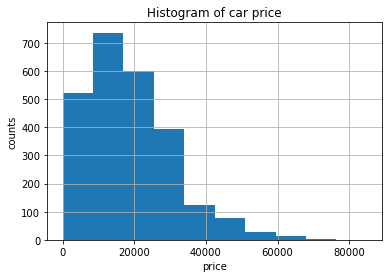

In [13]:
# Histogram of price
df1['price'].hist()
plt.xlabel('price')
plt.ylabel('counts')
plt.title('Histogram of car price')

Text(0.5, 1.0, 'Histogram of year')

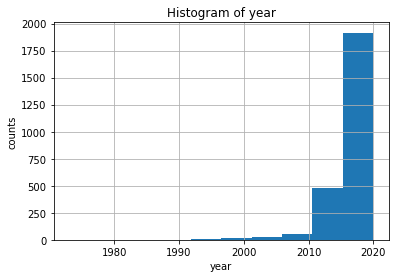

In [14]:
df1['year'].hist()
plt.xlabel('year')
plt.ylabel('counts')
plt.title('Histogram of year')

Text(0.5, 1.0, 'Histogram of mileage')

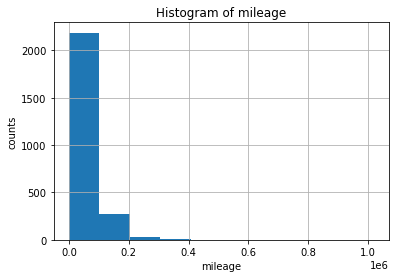

In [15]:
df1['mileage'].hist()
plt.xlabel('mileage')
plt.ylabel('counts')
plt.title('Histogram of mileage')

Text(0.5, 1.0, 'Bar plot of state')

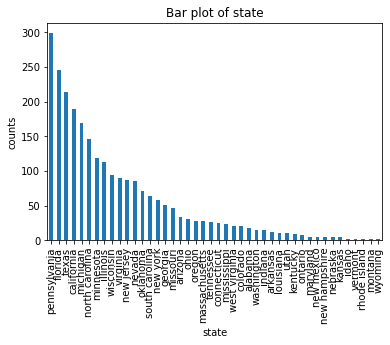

In [16]:
df1['state'].value_counts().plot(kind='bar')
plt.xlabel('state')
plt.ylabel('counts')
plt.title('Bar plot of state')

Text(0.5, 1.0, 'Barplot of mileage groups')

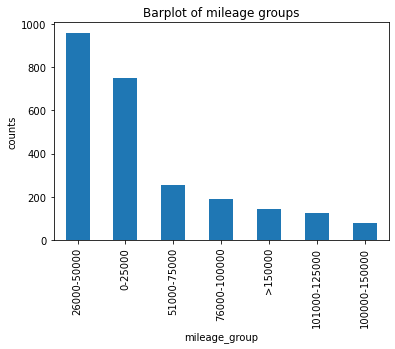

In [17]:
h['mileage_group'].value_counts().plot(kind='bar')
plt.xlabel('mileage_group')
plt.ylabel('counts')
plt.title('Barplot of mileage groups')

Text(0.5, 1.0, 'Barplot of car colours')

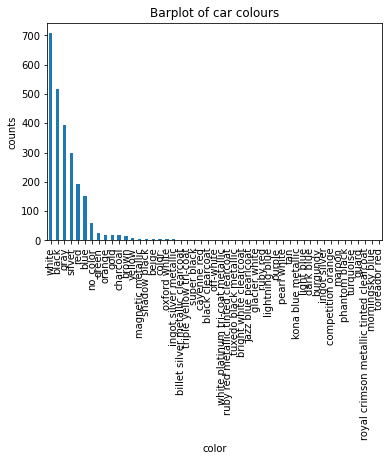

In [18]:
df1['color'].value_counts().plot(kind='bar')
plt.xlabel('color')
plt.ylabel('counts')
plt.title('Barplot of car colours')

Text(0.5, 1.0, 'Bar plot of brand')

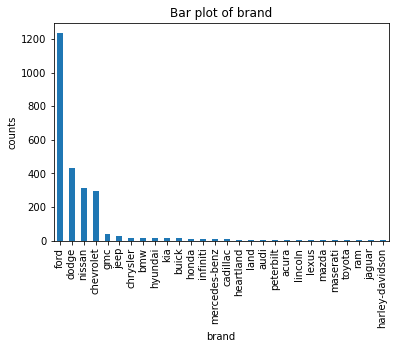

In [19]:
df1['brand'].value_counts().plot(kind='bar')
plt.xlabel('brand')
plt.ylabel('counts')
plt.title('Bar plot of brand')

In [20]:
# Getting the dummies for the categorical variables
#df2 = pd.get_dummies(df1)

Text(0.5, 1.0, 'Bar plot of model')

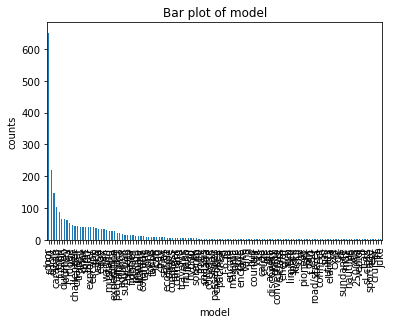

In [21]:
df1['model'].value_counts().plot(kind='bar')
plt.xlabel('model')
plt.ylabel('counts')
plt.title('Bar plot of model')

Text(0.5, 1.0, 'Bar plot of title_status')

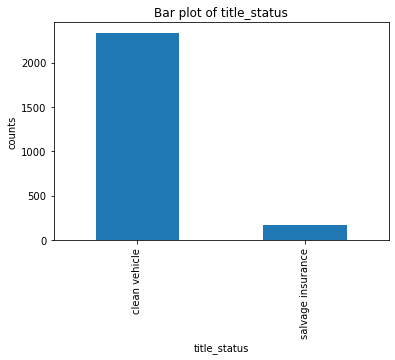

In [22]:
df1['title_status'].value_counts().plot(kind='bar')
plt.xlabel('title_status')
plt.ylabel('counts')
plt.title('Bar plot of title_status')

(0.0, 91917.69995328422)


Text(0.5, 1.0, 'Scatter plot of year versus price')

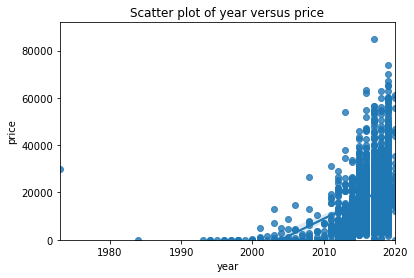

In [23]:
# 2 Visualization

# c) Scatter plots
sns.regplot(x="year", y="price", data=df1)
print(plt.ylim(0,))
plt.title('Scatter plot of year versus price')



Text(0.5, 1.0, 'Scatter plot of mileage versus price')

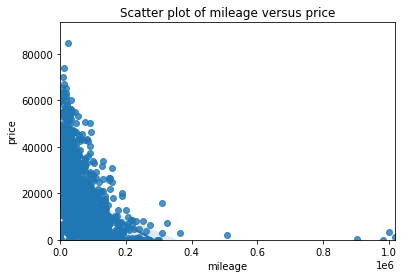

In [24]:
sns.regplot(x="mileage", y="price", data=df1)
plt.ylim(0,)
plt.title('Scatter plot of mileage versus price')

Text(0.5, 1.0, 'Scatter plot of lot versus price')

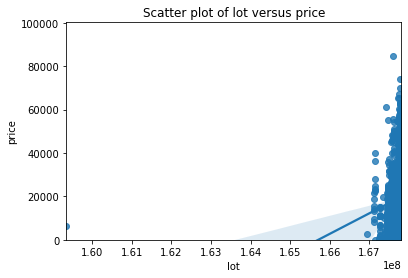

In [25]:
sns.regplot(x="lot", y="price", data=df1)
plt.ylim(0,)
plt.title('Scatter plot of lot versus price')

In [26]:
# The correlation between Price and the quantitative covariates (year, mileage and lot)
df1.corr()

# There is a mere possitive relationship between price of cars in USA and year
# There is a week negative relationship between price of cars in USA and mileage 
# There is a poor positive relationship between price of cars in USA and lot 

,price,year,mileage,lot
price,1.000000,0.418274,-0.400838,0.159369
year,0.418274,1.000000,-0.594686,0.164582
mileage,-0.400838,-0.594686,1.000000,-0.130475
lot,0.159369,0.164582,-0.130475,1.000000


In [27]:
from scipy import stats

Text(0.5, 1.0, 'Box plot of mileage_group versus price')

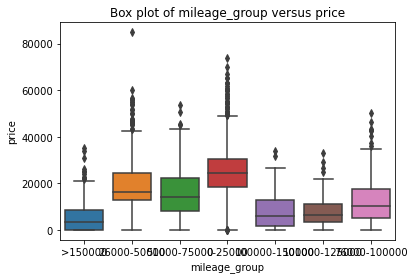

In [28]:
sns.boxplot(x="mileage_group", y="price", data=h)
plt.title('Box plot of mileage_group versus price')
# There seems to be a relationship between mileage groups and price of cars in USA

Text(0.5, 1.0, 'Box plot of brand versus price')

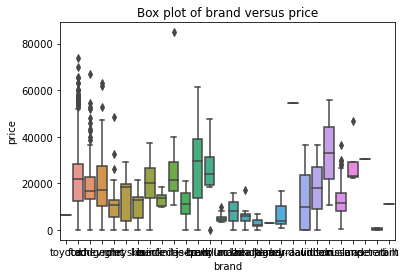

In [30]:
sns.boxplot(x="brand", y="price", data=h)
plt.title('Box plot of brand versus price')
# There seems to be a relationship between brand of cars and price of cars in USA

Text(0.5, 1.0, 'Box plot of car color versus price')

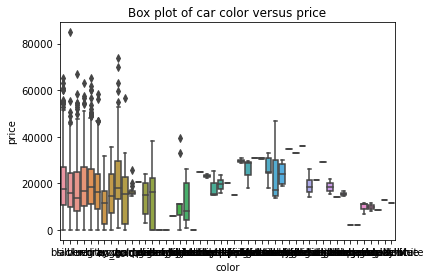

In [31]:
sns.boxplot(x="color", y="price", data=h)
plt.title('Box plot of car color versus price')
# There seems to be no a relationship between colour of cars and price of cars in USA

Text(0.5, 1.0, 'Box plot of state versus price')

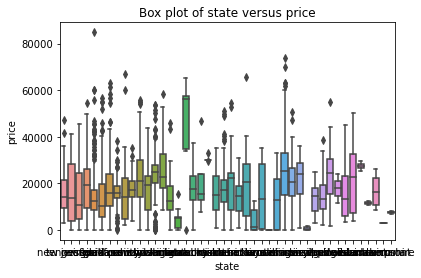

In [32]:
sns.boxplot(x="state", y="price", data=h)
plt.title('Box plot of state versus price')
# There seems to be a relationship between the differnt states and price of cars in USA


Text(0.5, 1.0, 'Box plot of model versus price')

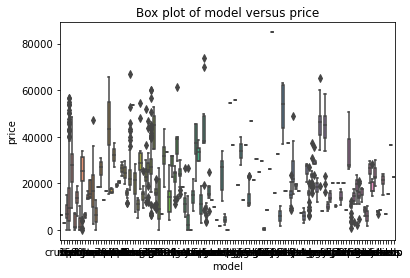

In [33]:
sns.boxplot(x="model", y="price", data=h)
plt.title('Box plot of model versus price')
# There seems to be a relationship between car model and price of cars in USA


Text(0.5, 1.0, 'Box plot of title_status versus price')

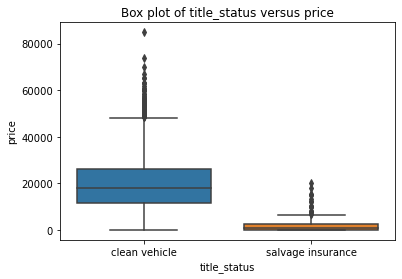

In [34]:
sns.boxplot(x="title_status", y="price", data=h)
plt.title('Box plot of title_status versus price')
# There seems to be a relationship between title_status and price of cars in USA


In [35]:
# 3 Model fitting
# a) Linear regression
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

X = df1[['year', 'mileage', 'lot']]
Y = df1['price']

lm.fit(X,Y)

Y_pred = lm.predict(X)

mse = np.mean((Y_pred - Y)**2)
print('The intercept is: ', lm.intercept_)
print('-'*80)
print(''*100)

print('While the coefficient of year, mileage and lot are respectively: ', lm.coef_)
print('-'*80)
print(''*100)

print('The mse is: ', mse)
print('-'*80)
print(''*100)

print('The R-square is: ', lm.score(X, Y))

The intercept is:  -2722955.879688779
--------------------------------------------------------------------------------

While the coefficient of year, mileage and lot are respectively:  [ 9.39161210e+02 -4.68799171e-02  5.06976229e-03]
--------------------------------------------------------------------------------

The mse is:  114779029.5565252
--------------------------------------------------------------------------------

The R-square is:  0.21781220437447368


In [37]:
import statsmodels.formula.api as smf
mode1 = smf.ols('price~year+mileage+lot', df1).fit()
mod_1_summary = mode1.summary()
print(mod_1_summary)

mod1_htm = mod_1_summary.tables[1].as_html()
pd.read_html(mod1_htm, header=0, index_col=0)[0]


# With an Adj. R-squared: of 0.217, means that our model was able to explain 22% of the total variation in car price.
# year, mileage and lot were significant at 5% level of significance, considering their frespective p-values which were all less than 0.05


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     231.6
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.50e-132
Time:                        07:48:26   Log-Likelihood:                -26735.
No. Observations:                2499   AIC:                         5.348e+04
Df Residuals:                    2495   BIC:                         5.350e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.723e+06   2.25e+05    -12.095      0.0

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.723000e+06,225000.000,-12.095,0.0,-3160000.000,-2280000.000
year,9.391612e+02,77.975,12.044,0.0,786.258,1092.064
mileage,-4.690000e-02,0.004,-10.481,0.0,-0.056,-0.038
lot,5.100000e-03,0.001,4.748,0.0,0.003,0.007


In [38]:
dp1 = df1.assign(lot_poly = (df1['lot']**2))
dp1 = dp1.assign(year_poly = (dp1['year']**2))
dp1 = dp1.assign(mileage_poly = (dp1['mileage']**2))
dp1 = dp1.assign(lot_yr = (dp1['lot']*dp1['year']))
dp1 = dp1.assign(lot_mil = (dp1['lot']*dp1['mileage']))
dp1 = dp1.assign(mil_yr = (dp1['mileage']*dp1['year']))
dp1 = dp1.assign(lot_yr_mil = (dp1['lot']*dp1['year']*dp1['mileage']))
dp1.head()





,price,brand,model,year,title_status,mileage,color,lot,state,lot_poly,year_poly,mileage_poly,lot_yr,lot_mil,mil_yr,lot_yr_mil
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,25392039105347209,4032064,7.514013e+10,319972384376,4.368021e+13,550426936.0,8.770987e+16
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,27872723883392644,4044121,3.631006e+10,335738987882,3.181290e+13,383200072.0,6.397574e+16
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia,28108443131209984,4072324,1.567368e+09,338329259104,6.637490e+12,79892620.0,1.339446e+16
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia,28141355867361025,4056196,4.114709e+09,337856263970,1.076074e+13,129190044.0,2.167213e+16
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida,28144513418986756,4072324,4.427572e+07,338546270788,1.116297e+12,13427772.0,2.252687e+15


In [39]:
#b) Polynomial Regression
mode2 = smf.ols('price~year+mileage+lot+lot_poly+year_poly+mileage_poly+lot_yr+lot_mil+mil_yr+lot_yr_mil', dp1).fit()
mod_2_summary = mode2.summary()
print(mod_2_summary)

mod2_htm = mod_2_summary.tables[1].as_html()
pd.read_html(mod2_htm, header=0, index_col=0)[0]


# With an Adj. R-squared: of 0.291, means that our model was able to explain 29% of the total variation in car price.
# year_poly, mileage_poly and lot_poly were significant at 5% level of significance, considering their frespective p-values 
# which were all less than 0.05




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     171.9
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.84e-183
Time:                        08:00:07   Log-Likelihood:                -26609.
No. Observations:                2499   AIC:                         5.323e+04
Df Residuals:                    2492   BIC:                         5.327e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.704e-06   4.77e-07      3.575   

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.704000e-06,4.770000e-07,3.575,0.000,7.700000e-07,2.640000e-06
year,4.100000e-03,1.000000e-03,3.576,0.000,2.000000e-03,6.000000e-03
mileage,-4.000000e-04,1.000000e-04,-3.541,0.000,-1.000000e-03,-0.000000e+00
lot,-3.330000e-02,2.000000e-03,-13.950,0.000,-3.800000e-02,-2.900000e-02
lot_poly,2.188000e-09,5.730000e-10,3.819,0.000,1.060000e-09,3.310000e-09
year_poly,1.424150e+01,3.982000e+00,3.576,0.000,6.432000e+00,2.205100e+01
mileage_poly,8.497000e-08,1.010000e-08,8.438,0.000,6.520000e-08,1.050000e-07
lot_yr,-3.000000e-04,9.540000e-05,-3.527,0.000,-1.000000e-03,-0.000000e+00
lot_mil,5.257000e-08,9.320000e-09,5.639,0.000,3.430000e-08,7.090000e-08
mil_yr,2.200000e-03,2.000000e-03,1.438,0.151,-1.000000e-03,5.000000e-03


In [ ]:
# Model Validation

# Adjusted R-square for model 1 (Linear Regression) = 0.217
# Adjusted R-square for model 2 (Polynomial Regression) = 0.291
# Comparing Model 1 and Model 2, We may choose to go with the polinomial Regression based on their respective Adjusted R-square

In [378]:

#Thank you